In [92]:
import pandas as pd
import numpy as np
import csv

In [96]:
usersdf = pd.read_csv('user.csv', sep=",", skiprows =[0], header = None, names=["userId", "Age", "Status", "Genre"])
placesdf = pd.read_csv('locations.csv', sep=",", skiprows =[0], header = None, names=["placeId", "Name"])
#placesdf.head()
usersdf.head()

,userId,Age,Status,Genre
0,1,23,S,F
1,2,19,S,F
2,3,19,S,M
3,4,19,S,F
4,5,20,S,M


In [51]:
columns = [i for i in range (1, 35)]
visiteddf = pd.DataFrame(columns=columns)
visiteddf = visiteddf.fillna(0)
visiteddf

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34


In [52]:
with open("places_user.csv", 'r') as f:
    reader = csv.reader(f)
    places = list(reader)

In [73]:
aux = []

def getindex(list, item):
    try:
        return list.index(item)+1
    except:
        return 0
    
plist = placesdf['Name'].tolist()
for e in places:
    auxp = [getindex(plist, p) for p in e]
    aux.append(auxp)

aux2 = []
for e in aux:
    aux2.append([y for y in e if y != 0])

In [139]:
aux2[0]


[4, 5, 3, 12, 17, 20, 9, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

In [81]:
visitedmatrix = []
for user in aux2:
    visitedmatrix.append([(1 if i in user else 0) for i in range(1, 35)])

In [88]:
len(visitedmatrix[0])

34

In [140]:
visiteddf = pd.DataFrame(visitedmatrix, columns=columns)
visiteddf.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,0,0,1,1,1,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
1,1,0,1,1,0,0,1,0,1,1,...,0,0,1,1,1,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,1,1,...,1,0,1,1,1,1,1,1,1,1


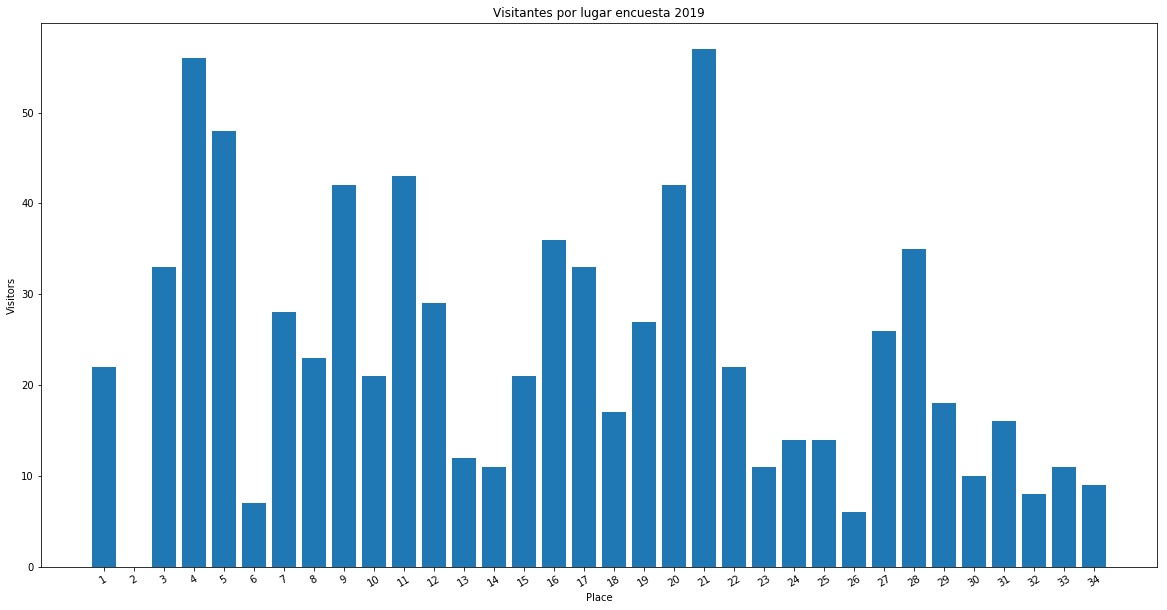

In [184]:
import matplotlib.pyplot as plt

#places_list = placesdf['Name'].tolist()
places_list = [i for i in range(1, 35)]
visitedlist = []

for column in visiteddf:
    visitedlist.append(sum(visiteddf[column].tolist()))

index = np.arange(len(places_list))
plt.bar(index, visitedlist)
plt.xlabel('Place', fontsize=10)
plt.ylabel('Visitors', fontsize=10)
plt.xticks(index, places_list, fontsize=10, rotation=30)
plt.title('Visitantes por lugar encuesta 2019')
plt.rcParams["figure.figsize"]=20,15
plt.show()


In [109]:
with open("activities_places.csv", 'r') as f2:
    reader = csv.reader(f2)
    act_places = list(reader)
    
with open("activities_user.csv", 'r') as f3:
    reader = csv.reader(f3)
    act_users = list(reader)


In [122]:
import math
from collections import Counter

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    simval = dotprod / (magA * magB)
    normalized = int(round(simval*5))
    return 1 if normalized == 0 else normalized

res = counter_cosine_similarity(Counter(act_places[2]), Counter(act_users[3]))
res

2

In [123]:
idtuple = []
for entry in aux2:
    idtuple.append([(aux2.index(entry)+1, i, counter_cosine_similarity(Counter(act_users[aux2.index(entry)]), Counter(act_places[i-1]))) for i in entry])

cleandataset = []
for tup in idtuple:
    cleandataset.extend(tup)

In [127]:
df = pd.DataFrame(cleandataset, columns=['userid', 'placeid', 'rating'])
df.head(10)

,userid,placeid,rating
0,1,4,2
1,1,5,1
2,1,3,2
3,1,12,2
4,1,17,1
5,1,20,4
6,1,9,3
7,1,21,3
8,1,22,3
9,1,23,4


In [128]:
df.to_csv('cleanDS.csv', sep=',', index=False)